### Data preprocessing

In [2]:
import pandas as pd

In [3]:
df = pd.read_csv('./Dataset/bank-full.csv', delimiter=';')
df.head(20)

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no
5,35,management,married,tertiary,no,231,yes,no,unknown,5,may,139,1,-1,0,unknown,no
6,28,management,single,tertiary,no,447,yes,yes,unknown,5,may,217,1,-1,0,unknown,no
7,42,entrepreneur,divorced,tertiary,yes,2,yes,no,unknown,5,may,380,1,-1,0,unknown,no
8,58,retired,married,primary,no,121,yes,no,unknown,5,may,50,1,-1,0,unknown,no
9,43,technician,single,secondary,no,593,yes,no,unknown,5,may,55,1,-1,0,unknown,no


#### finding missing values

In [ ]:
print(df.isnull().sum())

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
y            0
dtype: int64


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        45211 non-null  int64 
 1   job        45211 non-null  object
 2   marital    45211 non-null  object
 3   education  45211 non-null  object
 4   default    45211 non-null  object
 5   balance    45211 non-null  int64 
 6   housing    45211 non-null  object
 7   loan       45211 non-null  object
 8   contact    45211 non-null  object
 9   day        45211 non-null  int64 
 10  month      45211 non-null  object
 11  duration   45211 non-null  int64 
 12  campaign   45211 non-null  int64 
 13  pdays      45211 non-null  int64 
 14  previous   45211 non-null  int64 
 15  poutcome   45211 non-null  object
 16  y          45211 non-null  object
dtypes: int64(7), object(10)
memory usage: 5.9+ MB


In [6]:
df.describe()

,age,balance,day,duration,campaign,pdays,previous
count,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000
mean,40.936210,1362.272058,15.806419,258.163080,2.763841,40.197828,0.580323
std,10.618762,3044.765829,8.322476,257.527812,3.098021,100.128746,2.303441
min,18.000000,-8019.000000,1.000000,0.000000,1.000000,-1.000000,0.000000
25%,33.000000,72.000000,8.000000,103.000000,1.000000,-1.000000,0.000000
50%,39.000000,448.000000,16.000000,180.000000,2.000000,-1.000000,0.000000
75%,48.000000,1428.000000,21.000000,319.000000,3.000000,-1.000000,0.000000
max,95.000000,102127.000000,31.000000,4918.000000,63.000000,871.000000,275.000000


In [7]:
numeric_columns = df.select_dtypes(include=['int64', 'float64']).columns
print("Numeric Columns:", numeric_columns)

Numeric Columns: Index(['age', 'balance', 'day', 'duration', 'campaign', 'pdays', 'previous'], dtype='object')


In [8]:
categorical_columns = df.select_dtypes(include=['object']).columns
print("Categorical Columns:", categorical_columns)

Categorical Columns: Index(['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact',
       'month', 'poutcome', 'y'],
      dtype='object')


In [9]:
boolean_columns = df.select_dtypes(include=['bool']).columns
print("Boolean Columns:", boolean_columns)

Boolean Columns: Index([], dtype='object')


In [ ]:
df['job'].unique()
# df['marital'].unique()
# df['education'].unique()
# df['default'].unique()
# df['housing'].unique()
# df['contact'].unique()
# df['month'].unique()
# df['poutcome'].unique()
# df['y'].unique()
df['campaign'].unique()


array([ -1, 151, 166,  91,  86, 143, 147,  89, 140, 176, 101, 174, 170,
       167, 195, 165, 129, 188, 196, 172, 118, 119, 104, 171, 117, 164,
       132, 131, 123, 159, 186, 111, 115, 116, 173, 178, 110, 152,  96,
       103, 150, 175, 193, 181, 185, 154, 145, 138, 126, 180, 109, 158,
       168,  97, 182, 127, 130, 194, 125, 105, 102,  26, 179,  28, 183,
       155, 112, 120, 137, 124, 187, 190, 113, 162, 134, 169, 189,   8,
       144, 191, 184, 177,   5,  99, 133,  93,  92,  10, 100, 156, 198,
       106, 153, 146, 128,   7, 121, 160, 107,  90,  27, 197, 136, 139,
       122, 157, 149, 135,  30, 114,  98, 192, 163,  34,  95, 141,  31,
       199,  94, 108,  29, 268, 247, 253, 226, 244, 239, 245, 204, 231,
       238, 258, 230, 254, 265,  71, 223, 246, 250, 266, 240, 205, 261,
       259, 241, 260, 234, 251, 225, 161, 237, 262, 248, 255, 220, 227,
       206, 224, 249, 235, 228, 263,   2, 270, 232, 252, 207, 200, 269,
       233, 256, 273, 272, 242, 264, 208, 214, 222, 271, 203, 22

In [ ]:
pd.crosstab(df['contact'], df['y'], normalize='index')

y,no,yes
contact,,
cellular,0.850811,0.149189
telephone,0.865795,0.134205
unknown,0.959293,0.040707


In [ ]:
from scipy.stats import chi2_contingency

# If p value is < 0.05, the feature is influencing the targeted variable

crosstab = pd.crosstab(df['contact'], df['y'])
chi2, p, dof, expected = chi2_contingency(crosstab)
print("Chi-square statistic:", chi2)
print("p-value:", p)


Chi-square statistic: 1035.714225356292
p-value: 1.251738325340638e-225


In [13]:
df = df.drop(columns=['contact'])

In [14]:
crosstab = pd.crosstab(df['poutcome'], df['y'])
chi2, p, dof, expected = chi2_contingency(crosstab)
print("Chi-square statistic:", chi2)
print("p-value:", p)

Chi-square statistic: 4391.5065887686615
p-value: 0.0


In [15]:
crosstab = pd.crosstab(df['pdays'], df['y'])
chi2, p, dof, expected = chi2_contingency(crosstab)
print("Chi-square statistic:", chi2)
print("p-value:", p)

Chi-square statistic: 4527.588105960234
p-value: 0.0


In [16]:
crosstab = pd.crosstab(df['previous'], df['y'])
chi2, p, dof, expected = chi2_contingency(crosstab)
print("Chi-square statistic:", chi2)
print("p-value:", p)

Chi-square statistic: 1376.7948821882237
p-value: 7.564459382673111e-263


In [17]:
df.head()

,age,job,marital,education,default,balance,housing,loan,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,5,may,198,1,-1,0,unknown,no


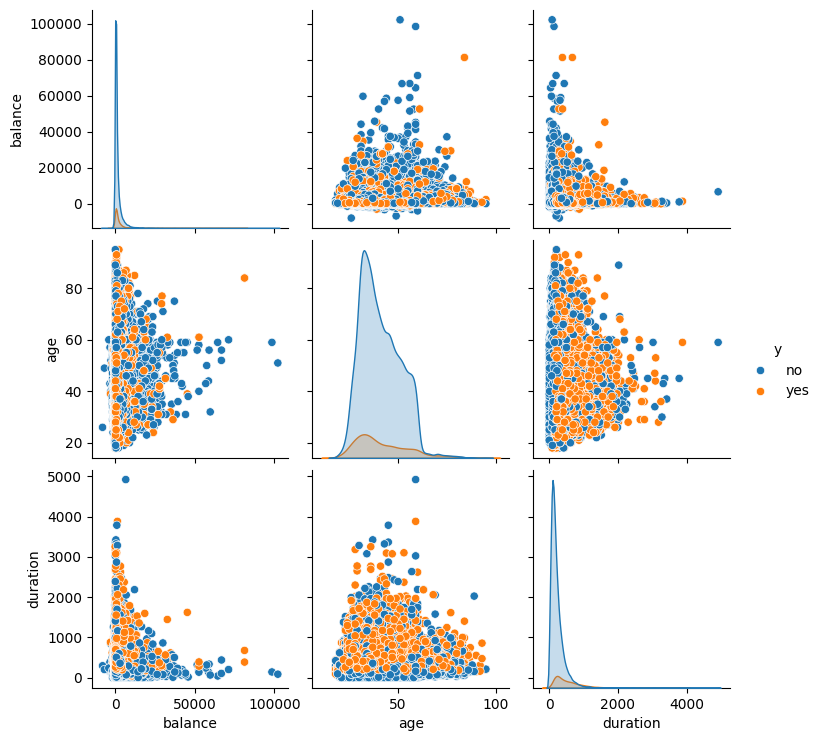

In [18]:
import seaborn as sns
sns.pairplot(df, hue='y', vars=['balance', 'age', 'duration'])


<Axes: xlabel='y', ylabel='balance'>

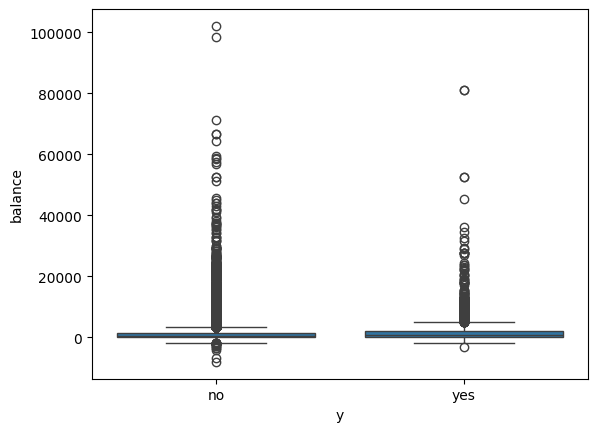

In [19]:
import seaborn as sns
sns.boxplot(x='y', y='balance', data=df)

In [23]:
print(df.duplicated().sum())  # Count the number of duplicate rows

0


In [24]:
from scipy.stats import pointbiserialr

# Step 1: Convert 'y' to numeric (binary)
df['y_binary'] = df['y'].map({'no': 0, 'yes': 1})

# Step 2: Define numerical features
numerical_features = ['age', 'balance', 'day', 'duration', 'campaign', 'pdays', 'previous']

# Step 3: Calculate Point-Biserial Correlation for each feature
correlation_results = []
for col in numerical_features:
    corr, p_value = pointbiserialr(df[col], df['y_binary'])
    correlation_results.append((col, corr, p_value))

# Step 4: Print results
print("Feature-wise Point-Biserial Correlation and p-values:")
for feature, corr, p_value in correlation_results:
    print(f"Feature: {feature}, Correlation: {corr:.3f}, p-value: {p_value:.3f}")


Feature-wise Point-Biserial Correlation and p-values:
Feature: age, Correlation: 0.025, p-value: 0.000
Feature: balance, Correlation: 0.053, p-value: 0.000
Feature: day, Correlation: -0.028, p-value: 0.000
Feature: duration, Correlation: 0.395, p-value: 0.000
Feature: campaign, Correlation: -0.073, p-value: 0.000
Feature: pdays, Correlation: 0.104, p-value: 0.000
Feature: previous, Correlation: 0.093, p-value: 0.000
